In [1]:
import biolqm
import cabean
from colomoto_jupyter import tabulate
import pandas as pd
#cabean.enable_debug()

In [2]:
from IPython.display import *

In [3]:
lqm = biolqm.load("http://ginsim.org/sites/default/files/SuppMat_Model_Master_Model.zginml")
bn = biolqm.to_minibn(lqm, ensure_boolean=True)

Downloading http://ginsim.org/sites/default/files/SuppMat_Model_Master_Model.zginml

In [4]:
bn.inputs()

['DNAdamage', 'ECMicroenv']

## Attractors

In [5]:
attractors = cabean.attractors(bn)
tabulate(attractors)

,AKT1,AKT2,Apoptosis,CDH1,CDH2,CTNNB1,CellCycleArrest,DKK1,DNAdamage,ECMicroenv,EMT,ERK,GF,Invasion,Metastasis,Migration,NICD,SMAD,SNAI1,SNAI2,TGFbeta,TWIST1,VIM,ZEB1,ZEB2,miR200,miR203,miR34,p21,p53,p63,p73
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
2,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0
3,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1
4,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0
5,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0
6,0,1,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0
7,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
8,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0


In [6]:
tabulate(cabean.attractors(bn, {"DNAdamage":1}))

,AKT1,AKT2,Apoptosis,CDH1,CDH2,CTNNB1,CellCycleArrest,DKK1,DNAdamage,ECMicroenv,EMT,ERK,GF,Invasion,Metastasis,Migration,NICD,SMAD,SNAI1,SNAI2,TGFbeta,TWIST1,VIM,ZEB1,ZEB2,miR200,miR203,miR34,p21,p53,p63,p73
0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0
2,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1
3,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0
4,0,1,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0
5,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0


### One-Step Reprogramming with Instantatenous Perturbations

In [7]:
r1 = cabean.OneStep_Instantaneous(bn)

In [8]:
%time s = r1.attractor_to_attractor(attractors[0], attractors[6])
s

CPU times: user 404 µs, sys: 5 ms, total: 5.4 ms
Wall time: 978 ms


[
 FromSteadyState('a0', InstantaneousPerturbation(DNAdamage=1, SNAI1=1, SNAI2=1, TWIST1=1, p63=1)),
 
 FromSteadyState('a0', InstantaneousPerturbation(CDH2=1, DNAdamage=1, SNAI1=1, SNAI2=1, TWIST1=1)),
 
 FromSteadyState('a0', InstantaneousPerturbation(AKT2=1, CDH2=1, DNAdamage=1, SNAI1=1, TWIST1=1))]

In [9]:
s.as_table()

,AKT2,CDH2,DNAdamage,SNAI1,SNAI2,TWIST1,p63
0,,,1,1,1,1,1
1,,1,1,1,1,1,
2,1,1,1,1,,1,


In [10]:
r1.attractor_to_attractor(attractors[0], attractors[6], exclude={"AKT2", "p63"})

[
 FromSteadyState('a0', InstantaneousPerturbation(CDH2=1, DNAdamage=1, SNAI1=1, SNAI2=1, TWIST1=1))]

In [11]:
%time s = r1.attractor_to_attractor(attractors[2], {"AKT2":1,"DKK1":1})
s

CPU times: user 4.19 ms, sys: 4.99 ms, total: 9.17 ms
Wall time: 2.22 s


[FromSteadyState('a2', InstantaneousPerturbation(DNAdamage=0, ECMicroenv=1)),
 
 FromSteadyState('a2', InstantaneousPerturbation(AKT2=1, CDH2=1, ECMicroenv=1, SNAI1=1, TWIST1=1, miR203=0, p53=0)),
 
 FromSteadyState('a2', InstantaneousPerturbation(ECMicroenv=1, NICD=1, SNAI2=1, ZEB1=1, miR200=0, miR203=0, p53=0)),
 
 FromSteadyState('a2', InstantaneousPerturbation(AKT2=1, ECMicroenv=1, NICD=1, TWIST1=1, miR200=0, miR203=0, p53=0))]

In [12]:
s.aliases

,AKT1,AKT2,Apoptosis,CDH1,CDH2,CTNNB1,CellCycleArrest,DKK1,DNAdamage,ECMicroenv,EMT,ERK,GF,Invasion,Metastasis,Migration,NICD,SMAD,SNAI1,SNAI2,TGFbeta,TWIST1,VIM,ZEB1,ZEB2,miR200,miR203,miR34,p21,p53,p63,p73
a8,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
a2,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0
a7,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0


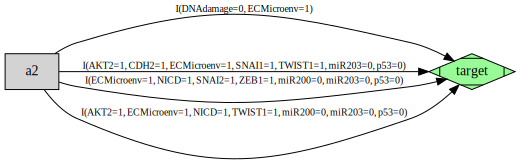

In [13]:
s.as_graph()

In [14]:
s.as_table()

,AKT2,CDH2,DNAdamage,ECMicroenv,NICD,SNAI1,SNAI2,TWIST1,ZEB1,miR200,miR203,p53
0,,,,1,1,,1,,1,0,0,0
1,,,0,1,,,,,,,,
2,1,,,1,1,,,1,,0,0,0
3,1,1,,1,,1,,1,,,0,0


### Sequential Reprogramming through Attractors with Instantatenous Perturbations

In [15]:
r3 = cabean.AttractorSequential_Instantaneous(bn)

In [16]:
%time s = r3.attractor_to_attractor(attractors[1], attractors[6])
s

CPU times: user 3.72 ms, sys: 3.06 ms, total: 6.78 ms
Wall time: 2.03 s


[
 FromSteadyState('a1', InstantaneousPerturbation(SNAI1=1, SNAI2=1, TWIST1=1, miR200=0)),
 
 FromSteadyState('a1', InstantaneousPerturbation(DNAdamage=0, ECMicroenv=1), 
     FromSteadyState('a7', InstantaneousPerturbation(DNAdamage=1, ECMicroenv=0))),
 
 FromSteadyState('a1', InstantaneousPerturbation(DNAdamage=0, ECMicroenv=1), 
     FromSteadyState('a7', InstantaneousPerturbation(ECMicroenv=0), 
         FromSteadyState('a5', InstantaneousPerturbation(DNAdamage=1)))),
 
 FromSteadyState('a1', InstantaneousPerturbation(DNAdamage=0, ECMicroenv=1), 
     FromSteadyState('a7', InstantaneousPerturbation(DNAdamage=1), 
         FromSteadyState('a8', InstantaneousPerturbation(ECMicroenv=0)))),
 
 FromSteadyState('a1', InstantaneousPerturbation(DNAdamage=0), 
     FromSteadyState('a0', InstantaneousPerturbation(ECMicroenv=1), 
         FromSteadyState('a7', InstantaneousPerturbation(DNAdamage=1, ECMicroenv=0)))),
 
 FromSteadyState('a1', InstantaneousPerturbation(DNAdamage=0), 
     FromSt

In [17]:
s.aliases

,AKT1,AKT2,Apoptosis,CDH1,CDH2,CTNNB1,CellCycleArrest,DKK1,DNAdamage,ECMicroenv,EMT,ERK,GF,Invasion,Metastasis,Migration,NICD,SMAD,SNAI1,SNAI2,TGFbeta,TWIST1,VIM,ZEB1,ZEB2,miR200,miR203,miR34,p21,p53,p63,p73
a0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
a3,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1
a5,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0
a6,0,1,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0
a7,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
a8,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0


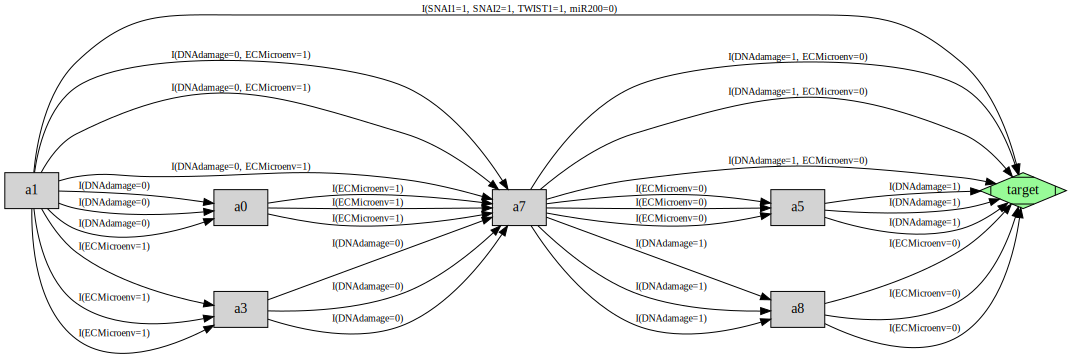

In [18]:
s.as_graph()

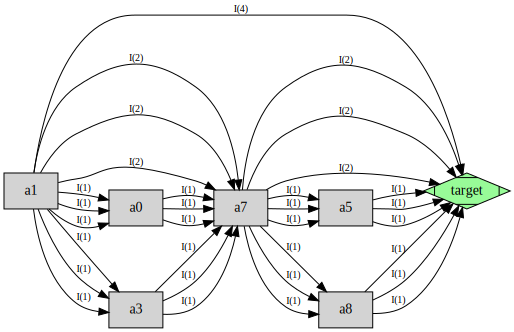

In [19]:
s.as_graph(compact=True)

In [20]:
s.perturbations()

{(InstantaneousPerturbation(DNAdamage=0),
  InstantaneousPerturbation(ECMicroenv=1),
  InstantaneousPerturbation(DNAdamage=1),
  InstantaneousPerturbation(ECMicroenv=0)),
 (InstantaneousPerturbation(DNAdamage=0),
  InstantaneousPerturbation(ECMicroenv=1),
  InstantaneousPerturbation(DNAdamage=1, ECMicroenv=0)),
 (InstantaneousPerturbation(DNAdamage=0),
  InstantaneousPerturbation(ECMicroenv=1),
  InstantaneousPerturbation(ECMicroenv=0),
  InstantaneousPerturbation(DNAdamage=1)),
 (InstantaneousPerturbation(DNAdamage=0, ECMicroenv=1),
  InstantaneousPerturbation(DNAdamage=1),
  InstantaneousPerturbation(ECMicroenv=0)),
 (InstantaneousPerturbation(DNAdamage=0, ECMicroenv=1),
  InstantaneousPerturbation(DNAdamage=1, ECMicroenv=0)),
 (InstantaneousPerturbation(DNAdamage=0, ECMicroenv=1),
  InstantaneousPerturbation(ECMicroenv=0),
  InstantaneousPerturbation(DNAdamage=1)),
 (InstantaneousPerturbation(ECMicroenv=1),
  InstantaneousPerturbation(DNAdamage=0),
  InstantaneousPerturbation(DNAdam

In [21]:
s.as_table()

,DNAdamage,ECMicroenv,SNAI1,SNAI2,TWIST1,miR200
0,,,1,1,1,0
1,*,*,,,,


### General Sequential Reprogramming

In [22]:
r2 = cabean.Sequential_Instantaneous(bn)

In [23]:
s = r2.attractor_to_attractor(attractors[2], attractors[8], maxsteps=5, limit=1)
s

[
 FromState('s2', InstantaneousPerturbation(ECMicroenv=1), 
     FromState('s1', InstantaneousPerturbation(DNAdamage=0), 
         FromState('s0', InstantaneousPerturbation(DNAdamage=1))))]

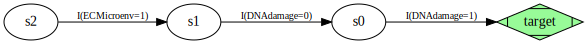

In [24]:
s.as_graph(compact=False)

In [25]:
s.perturbations()

{(InstantaneousPerturbation(ECMicroenv=1),
  InstantaneousPerturbation(DNAdamage=0),
  InstantaneousPerturbation(DNAdamage=1))}

In [26]:
s.as_table()

,DNAdamage,ECMicroenv
0,*,1
